In [1]:
import numpy as np
import pinocchio as pin
from comparer2 import Comparer
from IPython.display import clear_output

In [2]:
# velocity_list = ["10", "15", "20", "25"]
velocity = "40"
base = "575"
slope = "00"
comWeight = "1000"

comp = Comparer(
    slope_list=[round(float(slope)*1e-4, 5)],
    base_list=[round(float(base)*1e-3, 5)],
    velocity_list=[round(float(velocity)*1e-2, 5)],
    comWeight_list=[round(float(comWeight)*1e-3, 5)]
)
clear_output(wait=False)

In [3]:
comp.logs = {}
comp.names = []

path = f"../results/finals/reference_traj_{base}/walk_slope_{slope}_comWeight_{comWeight}_vel_{velocity}"
comp.add_log(
    path=f"{path}/closed.npy",
    robot_type="closed",
    name=f"velocity_{velocity}_result",
    s=round(float(slope)*1e-4, 5),
    b=round(float(base)*1e-3, 5),
    v=round(float(velocity)*1e-2, 5),
    w=int(comWeight)
    )
comp.add_log(
    path=f"{path}/closed_ws.npy",
    robot_type="closed",
    name=f"velocity_{velocity}_warmstart",
    s=round(float(slope)*1e-4, 5),
    b=round(float(base)*1e-3, 5),
    v=round(float(velocity)*1e-2, 5),
    w=int(comWeight)
)
# comp.add_log(
#     path=f"{path}/closed_warmstarted.npy",
#     robot_type="closed",
#     name=f"velocity_{velocity}_warmstarted",
#     s=round(float(slope)*1e-4, 5),
#     b=round(float(base)*1e-3, 5),
#     v=round(float(velocity)*1e-2, 5),
#     w=int(comWeight)
# )
# comp.add_log(
#     path=f"{path}/closed_warmstarted_ws.npy",
#     robot_type="closed",
#     name=f"velocity_{velocity}_warmstarted_ws",
#     s=round(float(slope)*1e-4, 5),
#     b=round(float(base)*1e-3, 5),
#     v=round(float(velocity)*1e-2, 5),
#     w=int(comWeight)
# )
# comp.add_log(
#     path=f"{path}/closed_warmstarted_warmstarted.npy",
#     robot_type="closed",
#     name=f"velocity_{velocity}_warmstarted_warmstarted",
#     s=round(float(slope)*1e-4, 5),
#     b=round(float(base)*1e-3, 5),
#     v=round(float(velocity)*1e-2, 5),
#     w=int(comWeight)
# )

comp.printNames()

Load "../results/finals/reference_traj_575/walk_slope_00_comWeight_1000_vel_40/closed.npy"!
Load "../results/finals/reference_traj_575/walk_slope_00_comWeight_1000_vel_40/closed_ws.npy"!
0: velocity_40_result
1: velocity_40_warmstart


/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:177: UserWarning: n_iter not found in the log velocity_40_warmstart, setting it to -1
  warn(f"n_iter not found in the log {name}, setting it to -1")


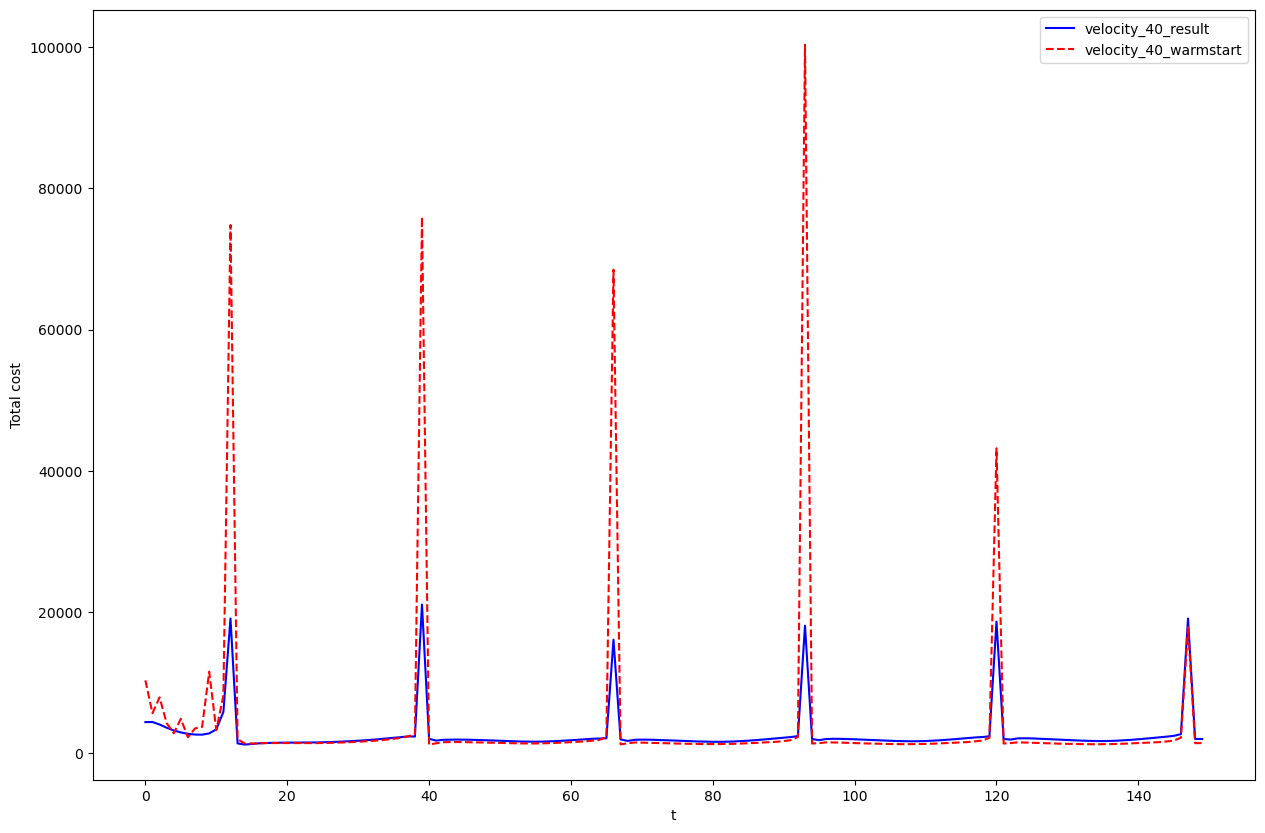

In [4]:
ids = (np.array([0, 1])).tolist()
name = comp.names[0]
xs = comp.logs[name]["xs"]
T = len(xs)
comp.setFigsize((15, 10))
comp.setTimeHorizon([0, 150])

comp.computeAllCosts()
comp.compareTotalCosts(ids=ids)

In [37]:
name = comp.names[0]
cost_closed = np.sum(comp.logs[name]["costs"]["total"])
name = comp.names[1]
cost_open = np.sum(comp.logs[name]["costs"]["total"])

name_closed = comp.names[0]
name_open = comp.names[1]
costs_keys = list(comp.logs[name]["costs"]["running"].keys())
for key in costs_keys:
    # print(comp.logs[name_open]["costs"].keys())
    # print(comp.logs[name_open]["costs"]["running"].keys())
    print(f"Cost {key}")
    cost_open = np.sum(comp.logs[name_open]["costs"]["running"][key])
    cost_closed = np.sum(comp.logs[name_closed]["costs"]["running"][key])
    print(f"\t Closed: {cost_closed}")
    print(f"\t Open : {cost_open}")
    print(f"\t Diff : {cost_open - cost_closed}")
    print(f"\t Diff % : {100*(cost_open - cost_closed)/cost_closed}")

print("Total Cost")
print(f"\t Closed: {cost_closed}")
print(f"\t Open: {cost_open}")
print(f"\t Cost open - closed: {cost_open - cost_closed}")
print(f"\t Diff %: {100*(cost_open - cost_closed)/cost_closed}")

Cost com
	 Closed: 0.04795563582928766
	 Open : 0.123811763897226
	 Diff : 0.07585612806793833
	 Diff % : 158.17979838276102
Cost comVelCost
	 Closed: 0.10650758097049395
	 Open : 0.15613007489297537
	 Diff : 0.049622493922481414
	 Diff % : 46.590574558470585
Cost ctrlReg
	 Closed: 105244.63467184013
	 Open : 130641.07577517636
	 Diff : 25396.441103336227
	 Diff % : 24.13086537145009
Cost foot_frame_left_cop
	 Closed: 2.3379193452802145
	 Open : 18153.002865558083
	 Diff : 18150.6649462128
	 Diff % : 776359.7569289684
Cost foot_frame_left_forceref
	 Closed: 284058.645796226
	 Open : 514346.3647919746
	 Diff : 230287.7189957486
	 Diff % : 81.07048400172589
Cost foot_frame_right_cop
	 Closed: 1.4258323789645106
	 Open : 22528.06898201618
	 Diff : 22526.643149637213
	 Diff % : 1579894.2064983016
Cost foot_frame_right_forceref
	 Closed: 323426.3662180995
	 Open : 479189.8385635925
	 Diff : 155763.47234549304
	 Diff % : 48.16041257454422
Cost stateReg
	 Closed: 5312.359697079937
	 Open : 58

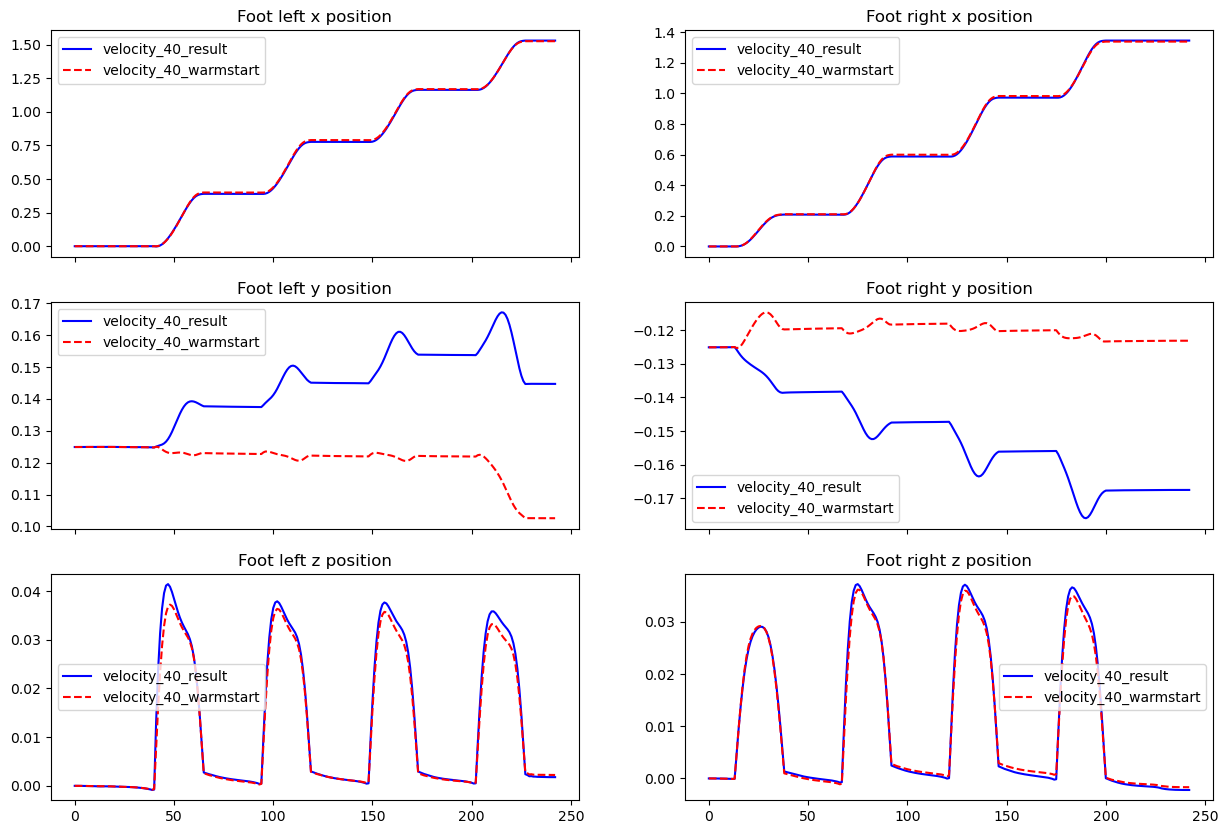

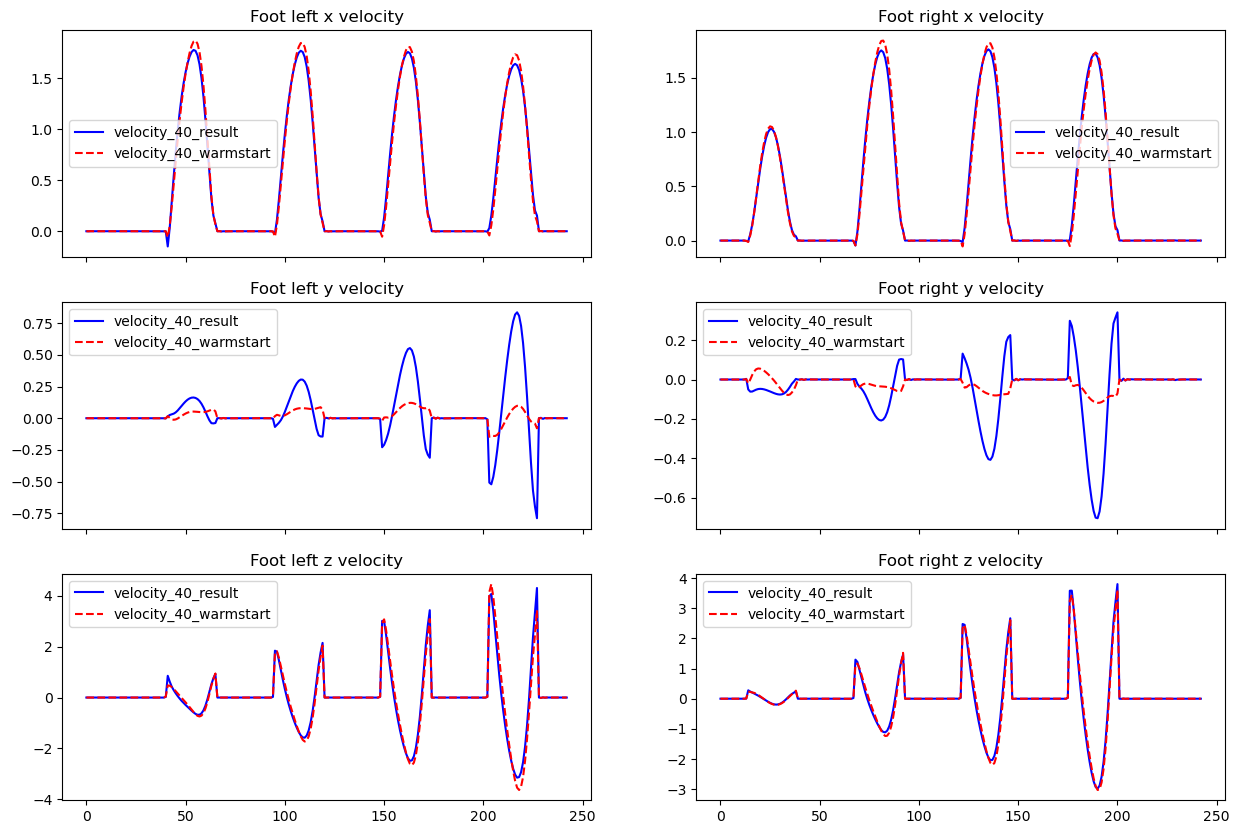

In [5]:
comp.computeAllFootTrajectories()
ids_closed = [0]
ids_open = [1]
comp.setFigsize((15, 10))
comp.setTimeHorizon([0, T])
comp.plotFootTrajectory(ids=[0,1])
# comp.plotFootTrajectory(ids=ids_closed)

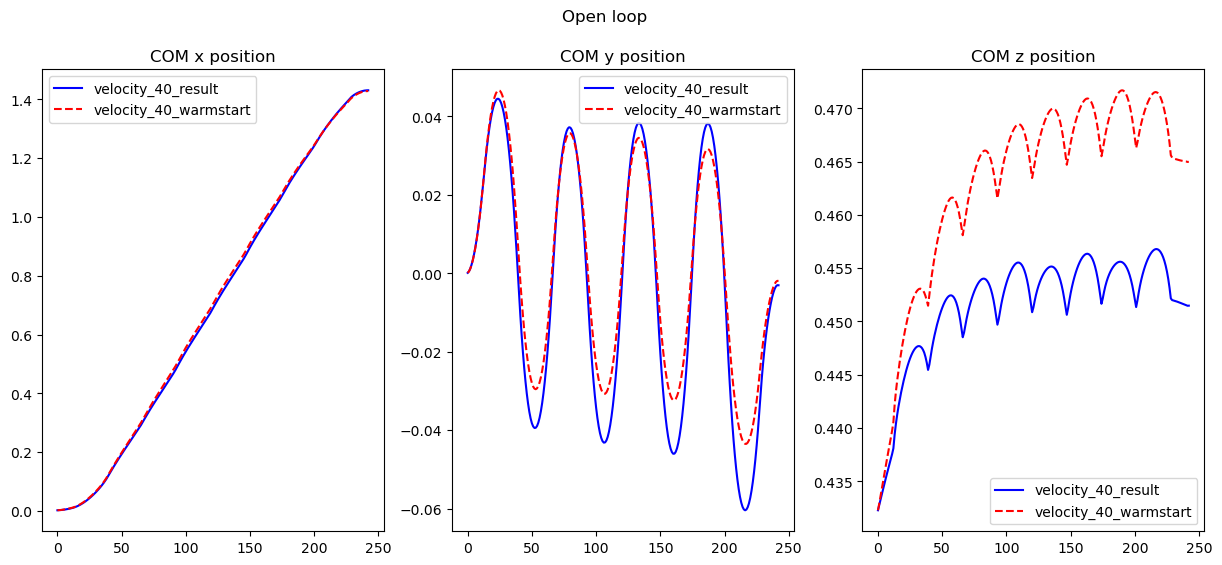

In [6]:
comp.computeAllCOMTrajectories()
comp.setFigsize((15, 6))
comp.plotCOMTrajectory(ids=[0, 1], title="Open loop", velocity=False)

In [7]:
us_closed = comp.logs[comp.names[0]]["us"]
us_open = comp.logs[comp.names[1]]["us"]

print(np.max(us_open, axis=0))

[42.474513   15.89516313 80.91470258 41.39351156 68.13803515 23.95681991
 50.53404741 24.28861542 85.13505602 16.30022312 28.78714243  6.95051726]


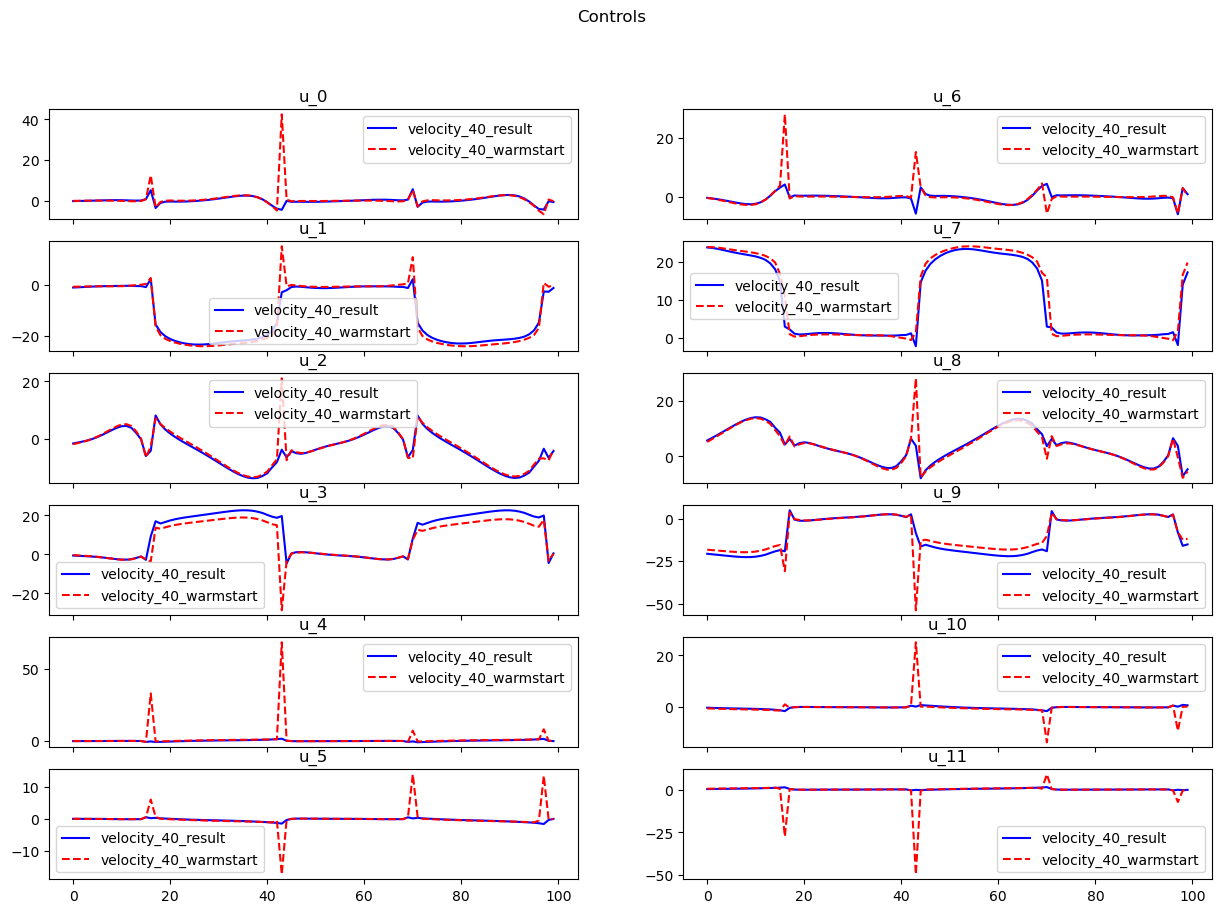

In [8]:
comp.setFigsize((15, 10))
comp.setTimeHorizon([50, 150])
comp.plotControls(ids=[0, 1], title="Controls")

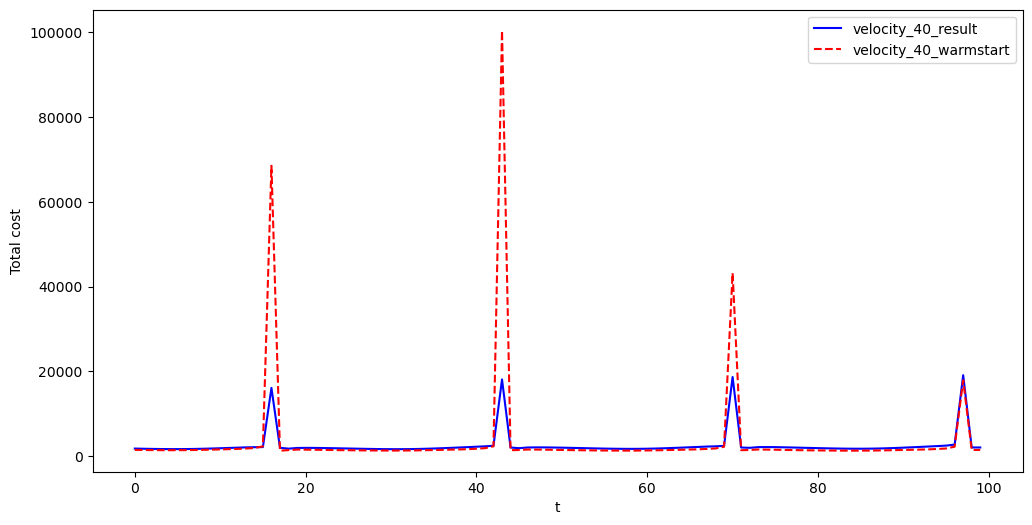

In [9]:
comp.setFigsize((12, 6))
comp.compareTotalCosts(ids=[0, 1])

/local/usr/ldematteis/Repositories/Software_LAAS_INRIA/sobec/examples/walk_without_think/trajectory_comparisons/comparer2.py:462: UserWarning: No keys specified, plotting all costs
  warn("No keys specified, plotting all costs")


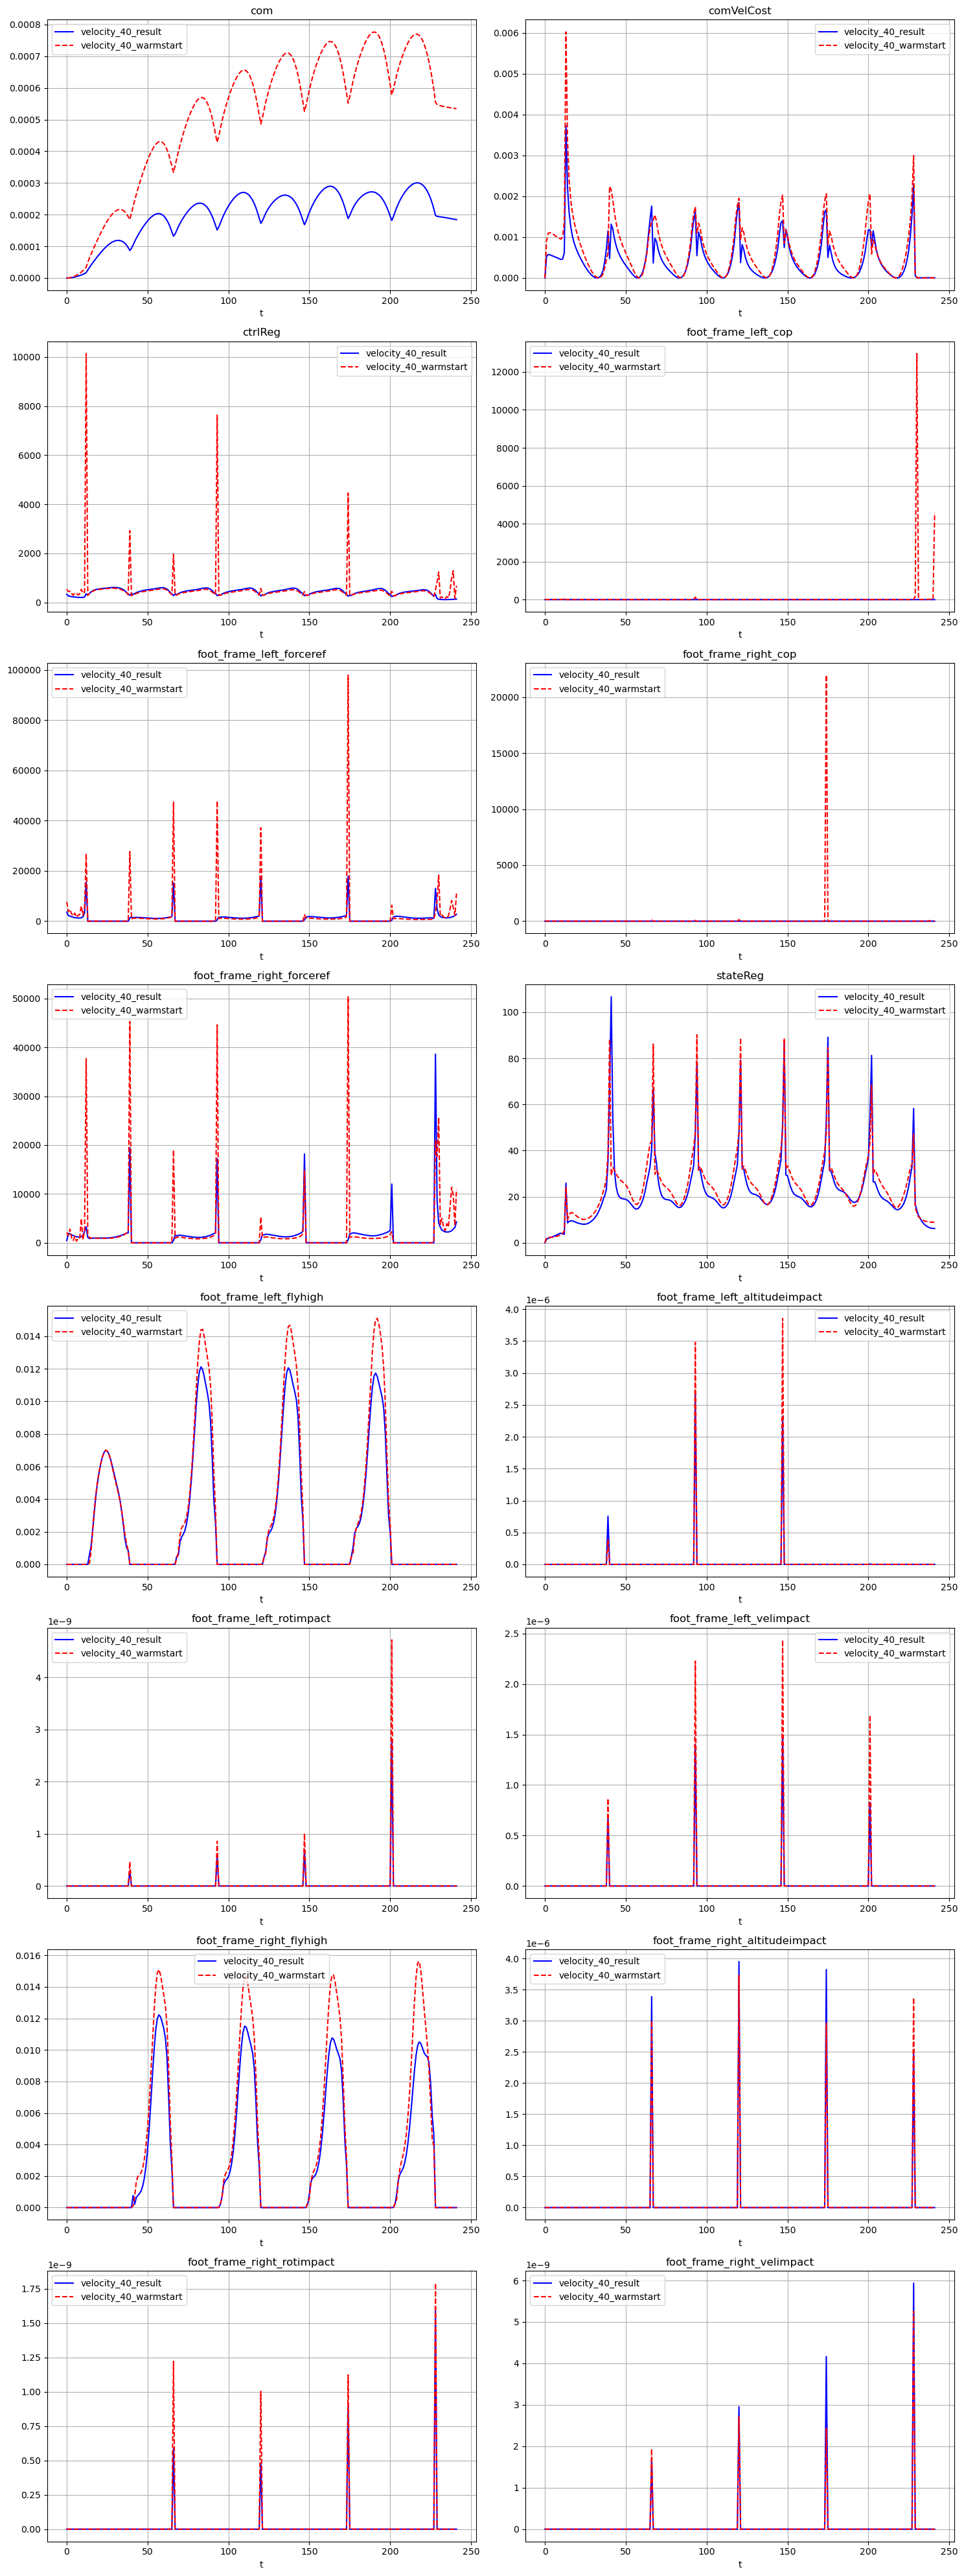

In [10]:
comp.setFigsize((15, 40))
comp.setTimeHorizon([0, T])
comp.compareRunningCosts(ids=[0, 1])

# Create proper figures to show in the paper

### Showing center of mass height variation

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_palette("colorblind")
# matplotlib.rcParams.update({'font.size': 20})
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('axes', lengendsize=BIGGER_SIZE)    # fontsize of the legend
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Plots for the reference trajectory

In [12]:
print(comp.logs[comp.names[0]].keys())

dict_keys(['xs', 'us', 'n_iter', 'robot', 'params', 'viz', 'ddp', 'control_order', 'costs', 'foot_traj', 'com'])


velocity_40_warmstart


[]

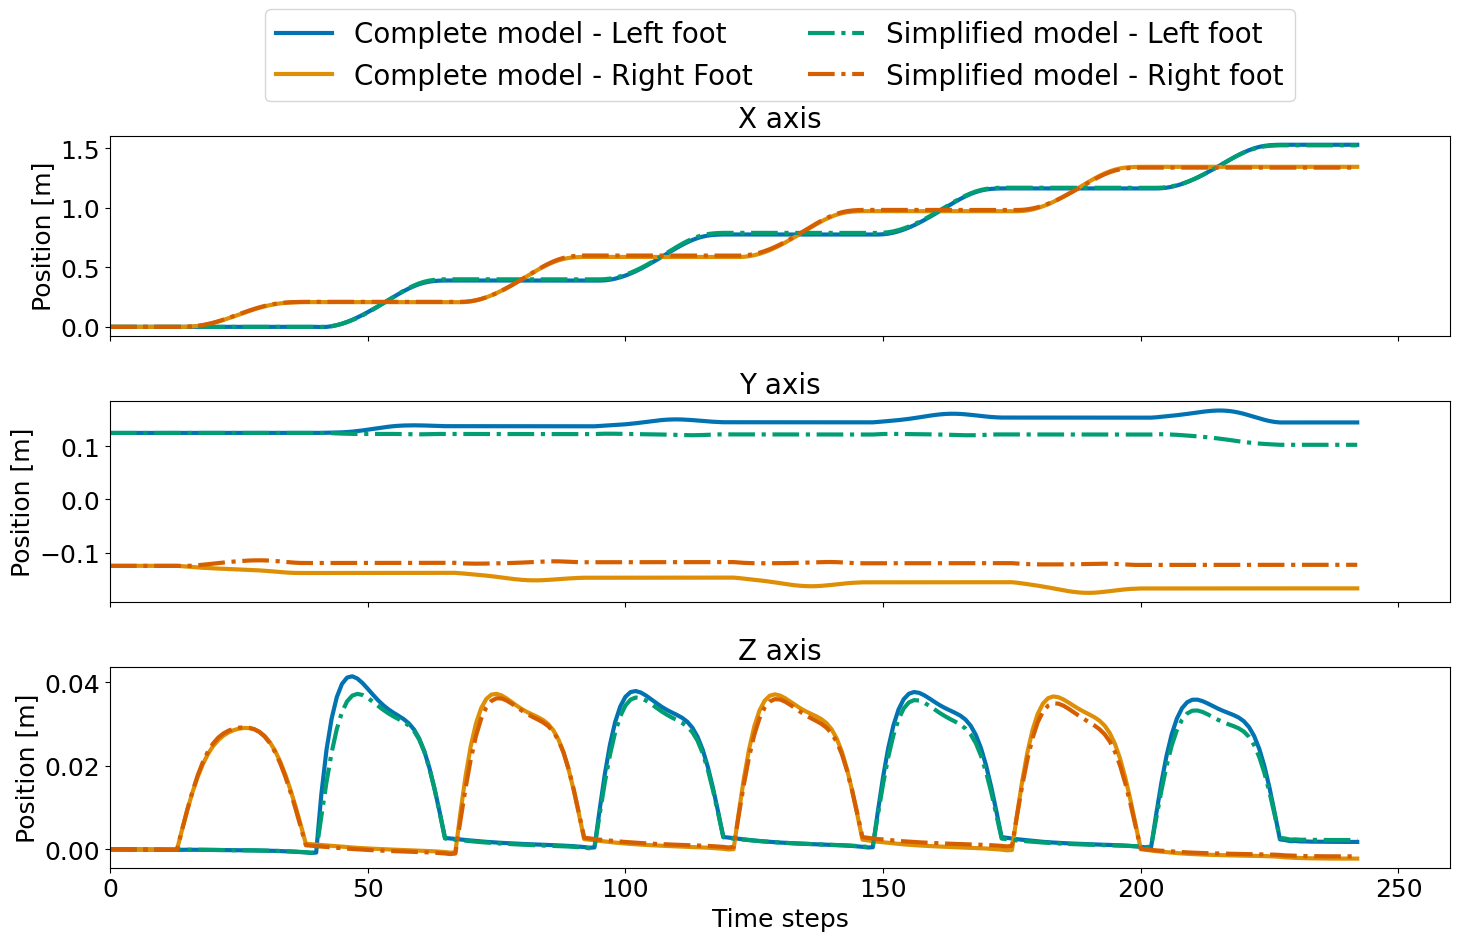

In [13]:
# Plot reference foot trajectory
reference_ids = [0, 1]
print(comp.names[reference_ids[1]])
# comp.plotFootTrajectory(ids=reference_ids, title="Reference Foot Trajectory")
x_axis_limit = [0, 260]

# change colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

left_linestyles = ["-", "-."]
right_linestyles = ["-", "-."]
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True, sharey='row')
for i in range(3):
    axes[i].set_prop_cycle(color=[colors[i] for i in [0, 1, 2, 3]])
    for k in range(2):
        foot_left_traj = np.array(comp.logs[comp.names[reference_ids[k]]]["foot_traj"]["position"])[:,0,:]
        foot_right_traj = np.array(comp.logs[comp.names[reference_ids[k]]]["foot_traj"]["position"])[:,1,:]
        axes[i].plot(foot_left_traj[:, i], linewidth=3, linestyle=left_linestyles[k])
        axes[i].plot(foot_right_traj[:, i], linewidth=3, linestyle=right_linestyles[k])
        # axes[i].set_title(f"Joint {i}")
        axes[i].grid()
        # axes[i].legend()
for i, name in enumerate(["X axis", "Y axis", "Z axis"]):
    axes[i].set_xlim(x_axis_limit)
    axes[i].set_ylabel("Position [m]")
    axes[i].set_title(name)
axes[0].legend(labels=["Complete model - Left foot", "Complete model - Right Foot", "Simplified model - Left foot", "Simplified model - Right foot"], bbox_to_anchor=(0.5, 1.7), loc='upper center', ncols=2)
axes[2].set_xlabel("Time steps")

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/ref_traj/foot_trajectory_comparison_base575.svg", format="svg")
plt.plot()

velocity_40_warmstart


[]

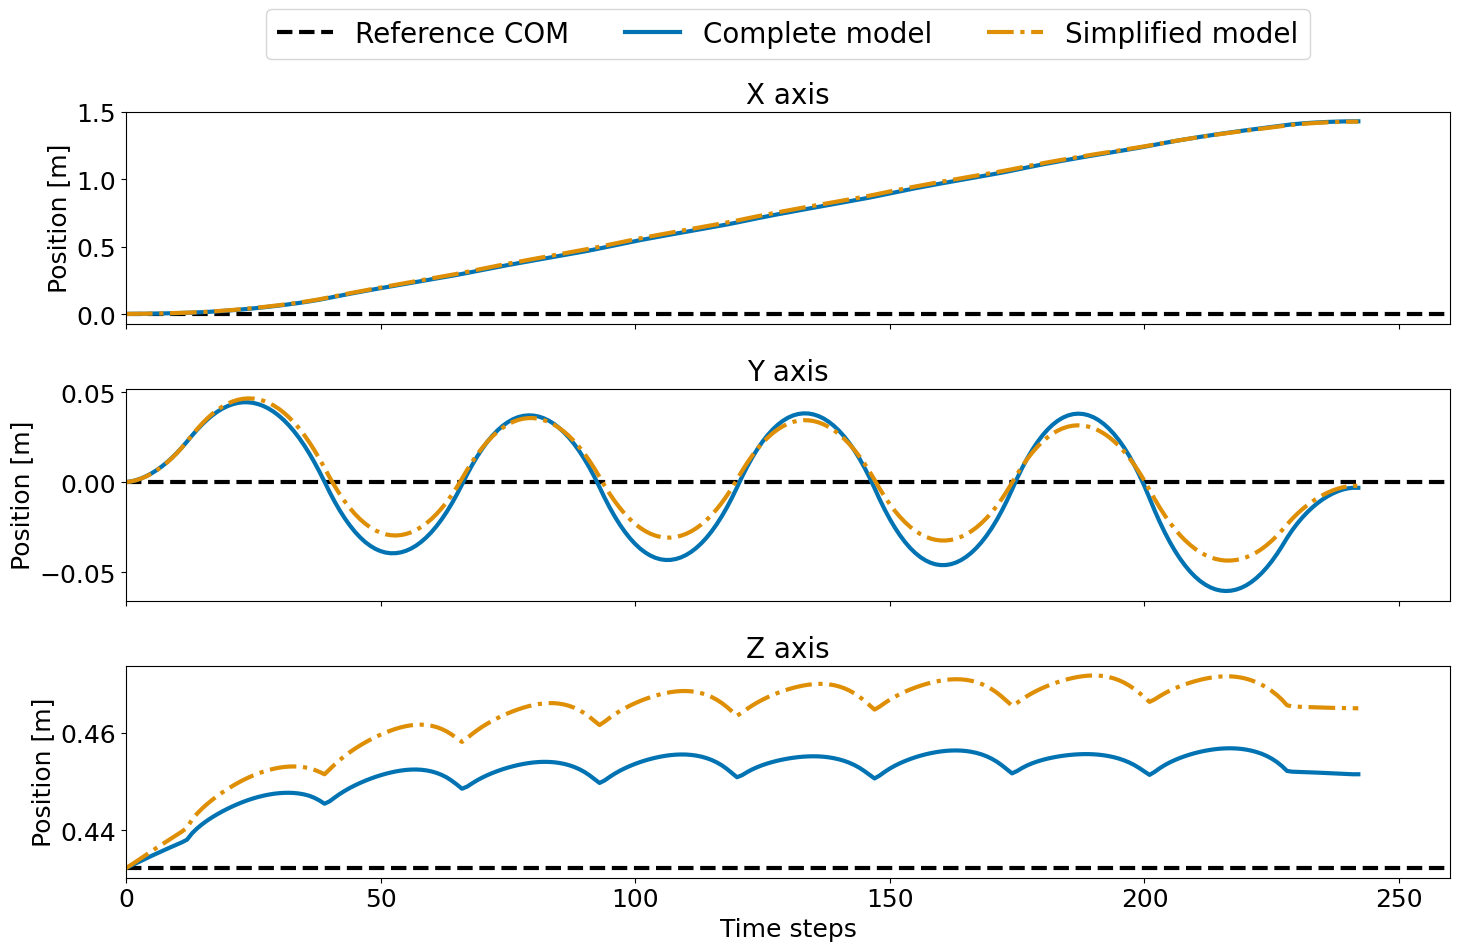

In [14]:
# Plot reference com trajectory
reference_ids = [0, 1]
print(comp.names[reference_ids[1]])
# comp.plotFootTrajectory(ids=reference_ids, title="Reference Foot Trajectory")
x_axis_limit = [0, 260]

# change colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

linestyles = ["-", "-."]
# right_linestyles = ["-", "-."]
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True, sharey='row')
com0 = comp.logs[comp.names[0]]["com"]["position"][0]
for i in range(3):
    axes[i].axhline(com0[i], xmin=0, xmax=1, color="k", linestyle="--", linewidth=3, label="Reference COM")
    for k in range(2):
        com = np.array(comp.logs[comp.names[reference_ids[k]]]["com"]["position"])
        # print(foot_left_traj.shape)
        axes[i].plot(com[:, i], linewidth=3, linestyle=linestyles[k])
        axes[i].grid()

for i, name in enumerate(["X axis", "Y axis", "Z axis"]):
    axes[i].set_xlim(x_axis_limit)
    axes[i].set_ylabel("Position [m]")
    axes[i].set_title(name)
axes[0].legend(labels=["Reference COM", "Complete model", "Simplified model"], bbox_to_anchor=(0.5, 1.55), loc='upper center', ncols=5)
axes[2].set_xlabel("Time steps")

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/ref_traj/com_trajectory_comparison_base575.svg", format="svg")
plt.plot()

velocity_40_warmstart


/tmp/ipykernel_19736/2669944067.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels=["Complete model", "Simplified model"],  bbox_to_anchor=(0.5, 1.04), loc='upper center', ncols=2)


[]

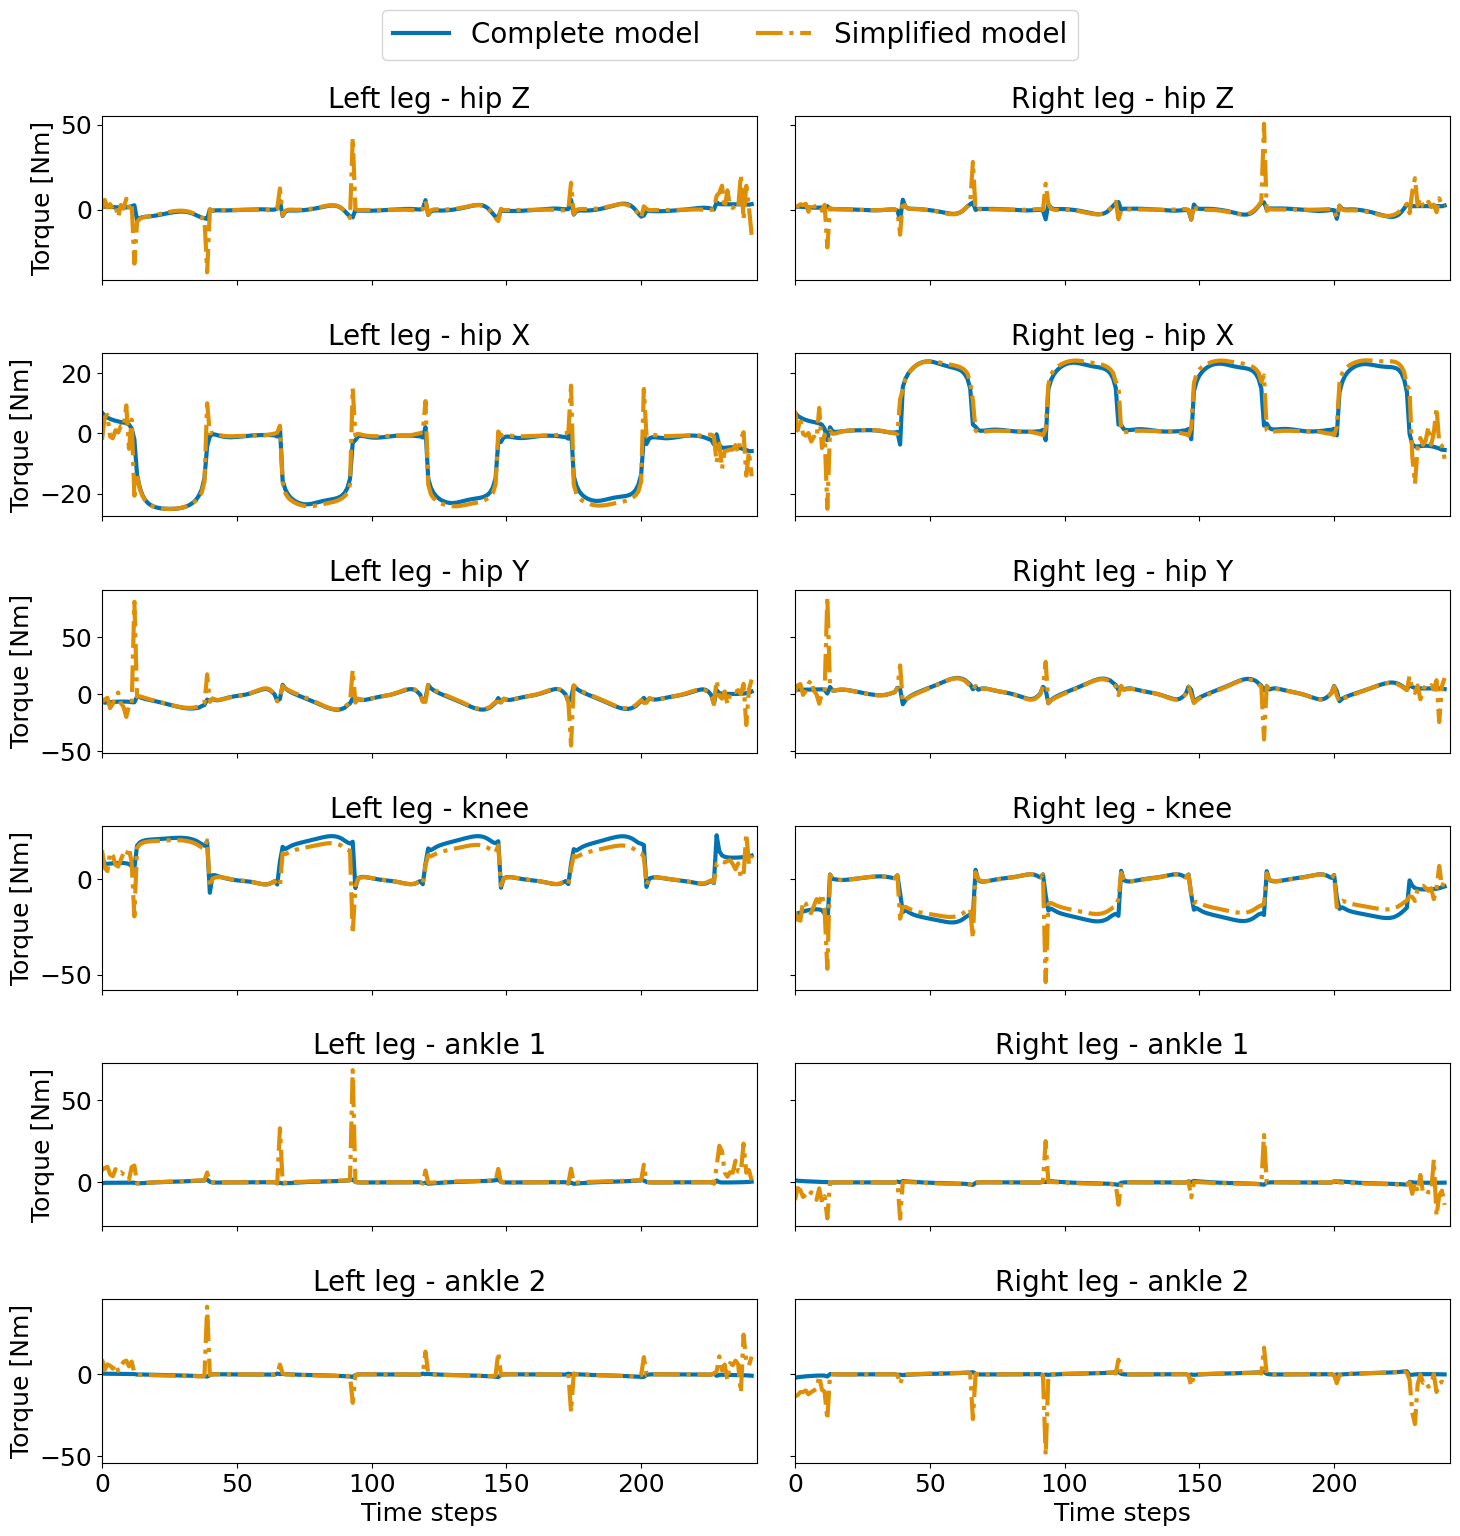

In [15]:
# Plot reference foot trajectory
reference_ids = [0, 1]
print(comp.names[reference_ids[1]])
# comp.plotFootTrajectory(ids=reference_ids, title="Reference Foot Trajectory")
x_axis_limit = [0, T]
y_axis_limits = [
[-15, 15],
[-30, 30],
[-20, 20],
[-30, 30],
[-5, 5],
[-5, 5],
]
linestyles = ["-", "-."]

fig, axes = plt.subplots(6, 2, figsize=(15, 15), sharex=True, sharey='row')
for i in range(6):
    joint = ["hip Z", "hip X", "hip Y", "knee", "ankle 1", "ankle 2"][i]
    for j in range(2):
        side = ["Left leg", "Right leg"][j]
        for k in range(2):
            us = np.array(comp.logs[comp.names[reference_ids[k]]]["us"])
            us = us[:, comp.logs[comp.names[reference_ids[k]]]["control_order"]]
            axes[i, j].plot(us[:, i + 6*j], linewidth=3, linestyle=linestyles[k])
        # axes[i, j].grid()
        axes[i, j].set_title(f"{side} - {joint}")
    axes[i, 0].set_ylabel("Torque [Nm]")
    axes[i, 0].set_xlim(x_axis_limit)
    # axes[i, 0].set_ylim(y_axis_limits[i])

axes[5, 0].set_xlabel("Time steps")
axes[5, 1].set_xlabel("Time steps")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels=["Complete model", "Simplified model"],  bbox_to_anchor=(0.5, 1.04), loc='upper center', ncols=2)

plt.tight_layout()
plt.savefig("/home/ldematteis/Images/ICRA_2025/results/ref_traj/controls_trajectory_comparison_base575.svg", format="svg")
plt.plot()

In [16]:
# play traj
viz = comp.logs[comp.names[5*8]]["viz"]
xs = comp.logs[comp.names[5*8]]["xs"]
model = comp.logs[comp.names[5*8]]["robot"].model
qs = xs[:, :model.nq]
viz.display(qs[0])
print(np.array(qs[0]))

IndexError: list index out of range